Name: Tim Chen

Date: 2/1/2021



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None) # remove the wierd SettingwithCopyWarning here
%matplotlib inline

Step 1: Correct Missing values

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IST347_Machine-Learning-in-Healthcare/Week_2/Assignment#1_Part2_Online_Activity.csv')
df.head()

,Gender,Race,Birth_Year,Marital_Status,Years_on_Internet,Hours_Per_Day,Preferred_Browser,Preferred_Search_Engine,Preferred_Email,Read_News,Online_Shopping,Online_Gaming,Facebook,Twitter,Other_Social_Network
0,M,White,1972,M,8,1,Firefox,Google,Yahoo,Y,N,N,Y,N,NaN
1,M,Hispanic,1981,S,14,2,Chrome,Google,Hotmail,Y,N,N,Y,N,NaN
2,F,African American,1977,S,6,2,Firefox,Yahoo,Yahoo,Y,Y,NaN,Y,N,NaN
3,F,White,1961,D,8,6,Firefox,Google,Hotmail,N,Y,N,N,Y,NaN
4,M,White,1954,M,2,3,Internet Explorer,Bing,Hotmail,Y,Y,N,Y,N,NaN


b.	Describe the dataset and provide 


In [3]:
df.describe

<bound method NDFrame.describe of    Gender              Race  Birth_Year  ... Facebook  Twitter  Other_Social_Network
0       M             White        1972  ...        Y        N                   NaN
1       M          Hispanic        1981  ...        Y        N                   NaN
2       F  African American        1977  ...        Y        N                   NaN
3       F             White        1961  ...        N        Y                   NaN
4       M             White        1954  ...        Y        N                   NaN
5       M  African American        1982  ...        N        N                   NaN
6       M  African American        1981  ...        Y        Y              LinkedIn
7       M             White        1977  ...        Y       99              LinkedIn
8       F  African American        1969  ...        N        N                   NaN
9       M             White        1987  ...        Y        N               MySpace
10      F          Hispanic    

•	number of rows/columns, 

In [4]:
df.shape

(11, 15)

•	data type

In [5]:
df.dtypes

Gender                     object
Race                       object
Birth_Year                  int64
Marital_Status             object
Years_on_Internet           int64
Hours_Per_Day               int64
Preferred_Browser          object
Preferred_Search_Engine    object
Preferred_Email            object
Read_News                  object
Online_Shopping            object
Online_Gaming              object
Facebook                   object
Twitter                    object
Other_Social_Network       object
dtype: object

•	attribute columns		 

In [6]:
df.columns

Index(['Gender', 'Race', 'Birth_Year', 'Marital_Status', 'Years_on_Internet',
       'Hours_Per_Day', 'Preferred_Browser', 'Preferred_Search_Engine',
       'Preferred_Email', 'Read_News', 'Online_Shopping', 'Online_Gaming',
       'Facebook', 'Twitter', 'Other_Social_Network'],
      dtype='object')

c.	Replace the attribute “Online_Gaming“ missing value as “N”

In [7]:
df.isna().sum()

Gender                     0
Race                       0
Birth_Year                 0
Marital_Status             0
Years_on_Internet          0
Hours_Per_Day              0
Preferred_Browser          0
Preferred_Search_Engine    0
Preferred_Email            0
Read_News                  1
Online_Shopping            2
Online_Gaming              3
Facebook                   0
Twitter                    0
Other_Social_Network       7
dtype: int64

In [8]:
df.Online_Gaming = df.Online_Gaming.fillna('N')


In [9]:
df.isna().sum() #online_gaming missing cell removed

Gender                     0
Race                       0
Birth_Year                 0
Marital_Status             0
Years_on_Internet          0
Hours_Per_Day              0
Preferred_Browser          0
Preferred_Search_Engine    0
Preferred_Email            0
Read_News                  1
Online_Shopping            2
Online_Gaming              0
Facebook                   0
Twitter                    0
Other_Social_Network       7
dtype: int64

Step 2: Data Reduction: 
Remove only those rows with missing values in online_shopping


In [10]:
df.dropna(how='any',subset=['Online_Shopping'],inplace=True)
df

,Gender,Race,Birth_Year,Marital_Status,Years_on_Internet,Hours_Per_Day,Preferred_Browser,Preferred_Search_Engine,Preferred_Email,Read_News,Online_Shopping,Online_Gaming,Facebook,Twitter,Other_Social_Network
0,M,White,1972,M,8,1,Firefox,Google,Yahoo,Y,N,N,Y,N,NaN
1,M,Hispanic,1981,S,14,2,Chrome,Google,Hotmail,Y,N,N,Y,N,NaN
2,F,African American,1977,S,6,2,Firefox,Yahoo,Yahoo,Y,Y,N,Y,N,NaN
3,F,White,1961,D,8,6,Firefox,Google,Hotmail,N,Y,N,N,Y,NaN
4,M,White,1954,M,2,3,Internet Explorer,Bing,Hotmail,Y,Y,N,Y,N,NaN
5,M,African American,1982,D,15,4,Internet Explorer,Google,Yahoo,Y,N,Y,N,N,NaN
6,M,African American,1981,D,11,2,Firefox,Google,Yahoo,NaN,Y,N,Y,Y,LinkedIn
8,F,African American,1969,M,6,2,Firefox,Google,Gmail,N,Y,N,N,N,NaN
10,F,Hispanic,1959,D,12,5,Chrome,Google,Gmail,Y,N,N,Y,N,Google+


Step 3: Replace Invalid Data:
Replace 99 with 'N' in 'Twitter'


In [11]:
df['Twitter'] == 'N'

0      True
1      True
2      True
3     False
4      True
5      True
6     False
8      True
10     True
Name: Twitter, dtype: bool

In [12]:
#df.Twitter = df.Twitter.replace('N',99)
df.loc[df['Twitter'] == 99,'Twitter'] = 'N' # change 99 to 'N' not N to 99
df

,Gender,Race,Birth_Year,Marital_Status,Years_on_Internet,Hours_Per_Day,Preferred_Browser,Preferred_Search_Engine,Preferred_Email,Read_News,Online_Shopping,Online_Gaming,Facebook,Twitter,Other_Social_Network
0,M,White,1972,M,8,1,Firefox,Google,Yahoo,Y,N,N,Y,N,NaN
1,M,Hispanic,1981,S,14,2,Chrome,Google,Hotmail,Y,N,N,Y,N,NaN
2,F,African American,1977,S,6,2,Firefox,Yahoo,Yahoo,Y,Y,N,Y,N,NaN
3,F,White,1961,D,8,6,Firefox,Google,Hotmail,N,Y,N,N,Y,NaN
4,M,White,1954,M,2,3,Internet Explorer,Bing,Hotmail,Y,Y,N,Y,N,NaN
5,M,African American,1982,D,15,4,Internet Explorer,Google,Yahoo,Y,N,Y,N,N,NaN
6,M,African American,1981,D,11,2,Firefox,Google,Yahoo,NaN,Y,N,Y,Y,LinkedIn
8,F,African American,1969,M,6,2,Firefox,Google,Gmail,N,Y,N,N,N,NaN
10,F,Hispanic,1959,D,12,5,Chrome,Google,Gmail,Y,N,N,Y,N,Google+


Step 4: Attribute reduction - Reduce the number of attributes by eliminating unused attributes 

Remove “Other_Social_Network”


In [13]:
df.drop('Other_Social_Network',axis=1,inplace=True)
df.columns

Index(['Gender', 'Race', 'Birth_Year', 'Marital_Status', 'Years_on_Internet',
       'Hours_Per_Day', 'Preferred_Browser', 'Preferred_Search_Engine',
       'Preferred_Email', 'Read_News', 'Online_Shopping', 'Online_Gaming',
       'Facebook', 'Twitter'],
      dtype='object')

Step 4: Save your notebook and upload to canvas.

Step 5: Using text cells, write briefly your observations and inferences.


{'1954-1960': 14, '1961-1965': 8, '1966-1970': 6, '1971-1975': 8, '1981-1985': 40, '1985+': 0, '1976-1980': 6}


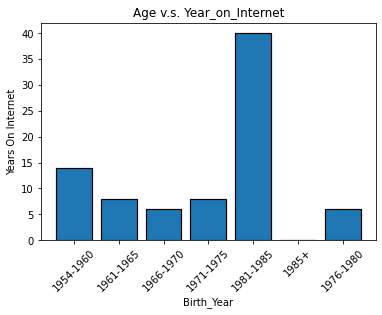

In [14]:
# calculate how much time spent for people born in different age.

year_d = {'1954-1960': 0,'1961-1965': 0,'1966-1970': 0,'1971-1975': 0,'1981-1985': 0,'1985+':0}
myear = 1954
byear = df.Birth_Year.values
time = df.Years_on_Internet.values

for i in range(len(byear)):

  if byear[i]-myear <=6:
    try: 
      year_d['1954-1960'] +=time[i]
    except:
      year_d['1954-1960'] = time[i]
  
  elif byear[i]-myear <=11:
    try: 
      year_d['1961-1965'] +=time[i]
    except:
      year_d['1961-1965'] = time[i]
  
  elif byear[i]-myear <=16:
    try: 
      year_d['1966-1970'] +=time[i]
    except:
      year_d['1966-1970'] = time[i]

  elif byear[i]-myear <=21:
    try: 
      year_d['1971-1975'] +=time[i]
    except:
      year_d['1971-1975'] = time[i]
  
  elif byear[i]-myear <=26:
    try: 
      year_d['1976-1980'] +=time[i]
    except:
      year_d['1976-1980'] = time[i]

  elif byear[i]-myear <=31:
    try: 
      year_d['1981-1985'] +=time[i]
    except:
      year_d['1981-1985'] = time[i]

  else:
      try:
        year_d['1985+'] +=time[i]
      except:
        year_d['1985+'] =time[i]

print(year_d)


plt.bar(year_d.keys(),year_d.values(),edgecolor='black', linewidth=1.2)
plt.xticks(rotation=45)
plt.title('Age v.s. Year_on_Internet')
plt.xlabel('Birth_Year')
plt.ylabel('Years On Internet')
plt.show()

From my perspective, people who born later than 1980, spent much more time on the internet than the people who born before 1980. The number increased significantly started from 1980. I expect the number in 1985+ will be higher than 1981-1985. However, since there are only two data points are after 1985+, and there are 11 data points in total, (4 dropped because of dropping the missing value in early exerceis), this chart can't present the real-world data. 